In [52]:
import pandas as pd


In [53]:
data = pd.read_csv('/Users/hitengoel/Machine Learning/data-analysis-with-technical-indicators/nifty_sensex_close_data/data/Sensex_2011_to_2023(separated).csv')

In [54]:
mnm = data[['Date','M&M.NS(close)']]
mnm

,Date,M&M.NS(close)
0,2011-01-03,354.620422
1,2011-01-04,351.783600
2,2011-01-05,347.190735
3,2011-01-06,347.280792
4,2011-01-07,333.344513
...,...,...
3199,2023-12-22,1634.250000
3200,2023-12-26,1662.250000
3201,2023-12-27,1687.949951
3202,2023-12-28,1734.449951


In [55]:
#parameters
n = 6
m = 45
t = 9

In [56]:

mnm.loc[:,'EMAn'] = mnm['M&M.NS(close)'].ewm(span=n, adjust=False).mean()

mnm.loc[:,'EMAm'] = mnm['M&M.NS(close)'].ewm(span=m, adjust=False).mean()


/var/folders/94/qzww3__j7w95pdc_5q59f29c0000gn/T/ipykernel_1752/1411935539.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mnm.loc[:,'EMAn'] = mnm['M&M.NS(close)'].ewm(span=n, adjust=False).mean()
/var/folders/94/qzww3__j7w95pdc_5q59f29c0000gn/T/ipykernel_1752/1411935539.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mnm.loc[:,'EMAm'] = mnm['M&M.NS(close)'].ewm(span=m, adjust=False).mean()


In [57]:
for i in range(n):
    mnm.loc[i,'EMAn'] = None
for i in range(m):
    mnm.loc[i,'EMAm'] = None
    

In [58]:

mnm['MACD'] = mnm['EMAn'] - mnm['EMAm']
mnm['Signal Line'] = mnm['MACD'].ewm(span=t, adjust=False).mean()
mnm

/var/folders/94/qzww3__j7w95pdc_5q59f29c0000gn/T/ipykernel_1752/3089229355.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mnm['MACD'] = mnm['EMAn'] - mnm['EMAm']
/var/folders/94/qzww3__j7w95pdc_5q59f29c0000gn/T/ipykernel_1752/3089229355.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mnm['Signal Line'] = mnm['MACD'].ewm(span=t, adjust=False).mean()


,Date,M&M.NS(close),EMAn,EMAm,MACD,Signal Line
0,2011-01-03,354.620422,NaN,NaN,NaN,NaN
1,2011-01-04,351.783600,NaN,NaN,NaN,NaN
2,2011-01-05,347.190735,NaN,NaN,NaN,NaN
3,2011-01-06,347.280792,NaN,NaN,NaN,NaN
4,2011-01-07,333.344513,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
3199,2023-12-22,1634.250000,1658.215112,1609.877335,48.337778,70.230471
3200,2023-12-26,1662.250000,1659.367937,1612.154407,47.213530,65.627083
3201,2023-12-27,1687.949951,1667.534227,1615.449865,52.084362,62.918539
3202,2023-12-28,1734.449951,1686.653005,1620.623782,66.029223,63.540676


In [59]:
trades = pd.DataFrame(columns=[['Date','Order Type','Price']])

In [60]:
for i in range(m+1,len(mnm.index)):
    if mnm.loc[i,'MACD'] > mnm.loc[i,'Signal Line'] and mnm.loc[i-1,'MACD'] < mnm.loc[i-1,'Signal Line']:
        trades.loc[len(trades.index)]  = [mnm.loc[i,'Date'],'Buy',mnm.loc[i,'M&M.NS(close)']]
    if mnm.loc[i,'MACD'] < mnm.loc[i,'Signal Line'] and mnm.loc[i-1,'MACD'] > mnm.loc[i-1,'Signal Line']:
        trades.loc[len(trades.index)]  = [mnm.loc[i,'Date'],'Sell',mnm.loc[i,'M&M.NS(close)']]

In [61]:

trades['Order Type'] = trades['Order Type'].astype(str)
if trades.loc[0]['Order Type'] == 'Sell':
    trades = trades[1:]

if trades.loc[len(trades.index)]['Order Type'] == 'Buy':
    trades = trades[:-1]

trades.reset_index(inplace = True)
trades


,index,Date,Order Type,Price
0,1,2011-03-16,Buy,297.186737
1,2,2011-03-18,Sell,284.173645
2,3,2011-03-23,Buy,290.927887
3,4,2011-05-02,Sell,333.952484
4,5,2011-05-27,Buy,317.404510
...,...,...,...,...
291,292,2023-09-25,Sell,1589.449951
292,293,2023-10-16,Buy,1574.550049
293,294,2023-10-26,Sell,1506.099976
294,295,2023-11-09,Buy,1552.050049


In [62]:
profits = 0
losses = 0
for i in range(1,len(trades.index)):
    if(trades.loc[i]['Price'] - trades.loc[i-1]['Price'] > 0):
        profits += trades.loc[i]['Price'] - trades.loc[i-1]['Price']
    else:
        losses += trades.loc[i-1]['Price'] - trades.loc[i]['Price']

net_profit = profits - losses
profit_factor = profits/losses
num = len(trades.index)
print('Number of Trades:',num)
print('Net Profit:',net_profit)
print('Profit Factor:',profit_factor)

Number of Trades: 296
Net Profit: 1349.7632141113281
Profit Factor: 1.4218055741418096


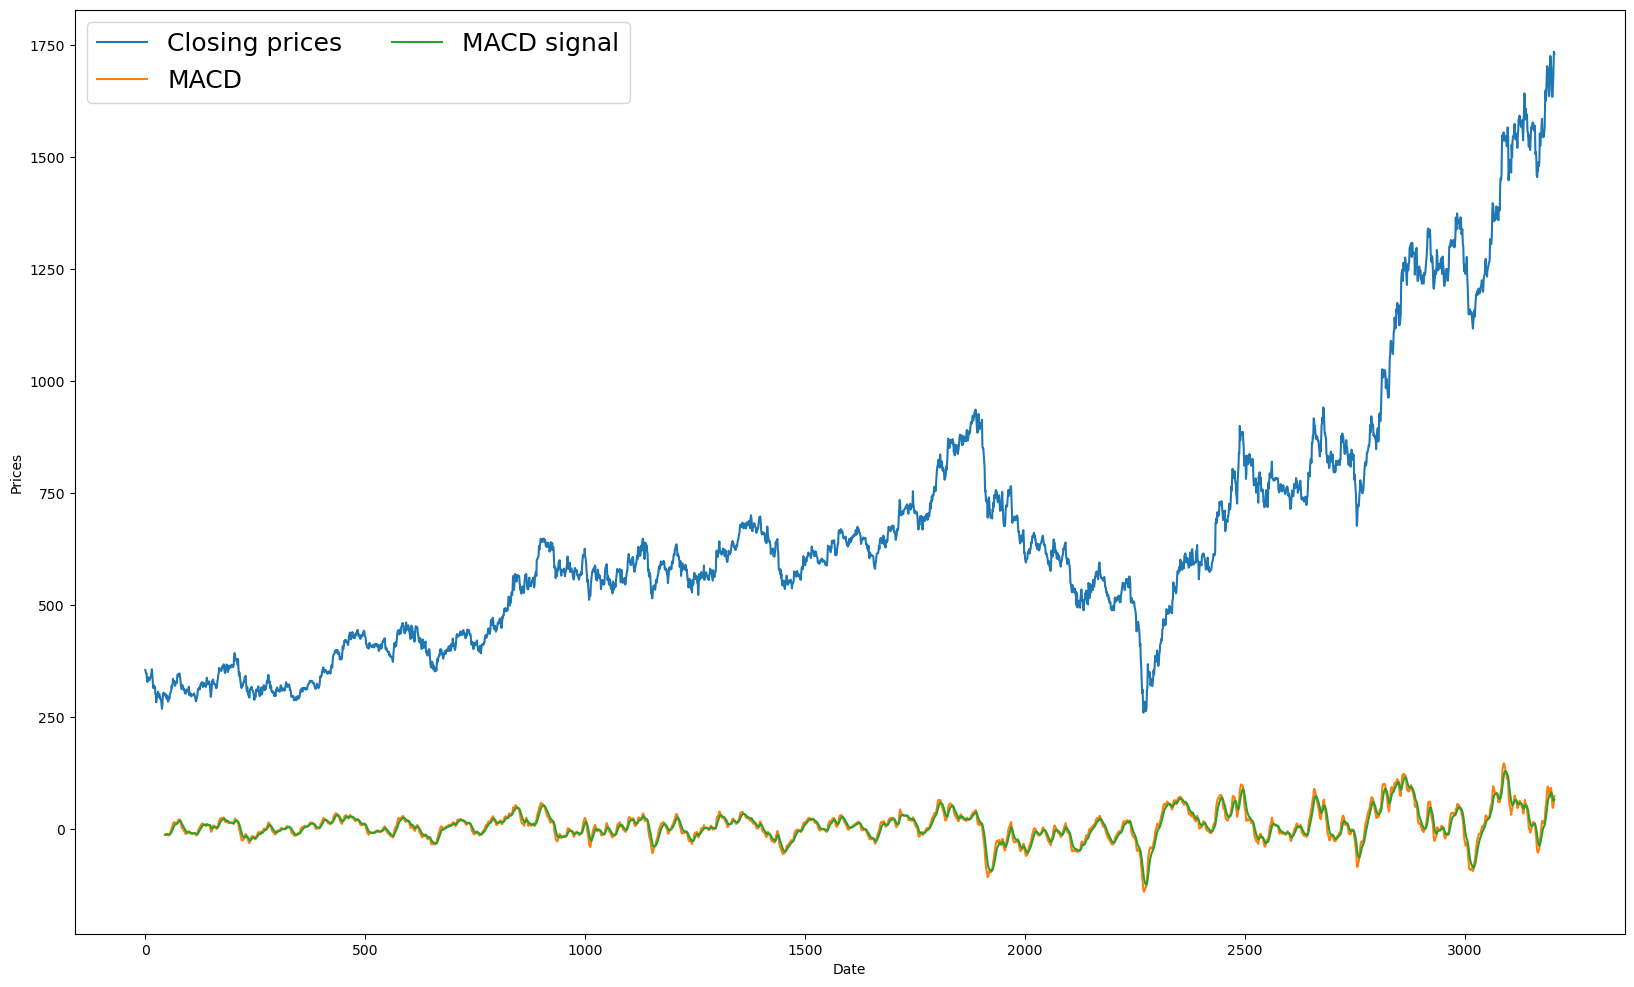

In [63]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12))

plt.plot(mnm["M&M.NS(close)"], label = "Closing prices")
plt.plot(mnm["MACD"], label = "MACD")
plt.plot(mnm["Signal Line"], label = "MACD signal")

plt.xlabel("Date")
plt.ylabel("Prices")
plt.legend(fontsize=18, ncols = 2)
plt.show()


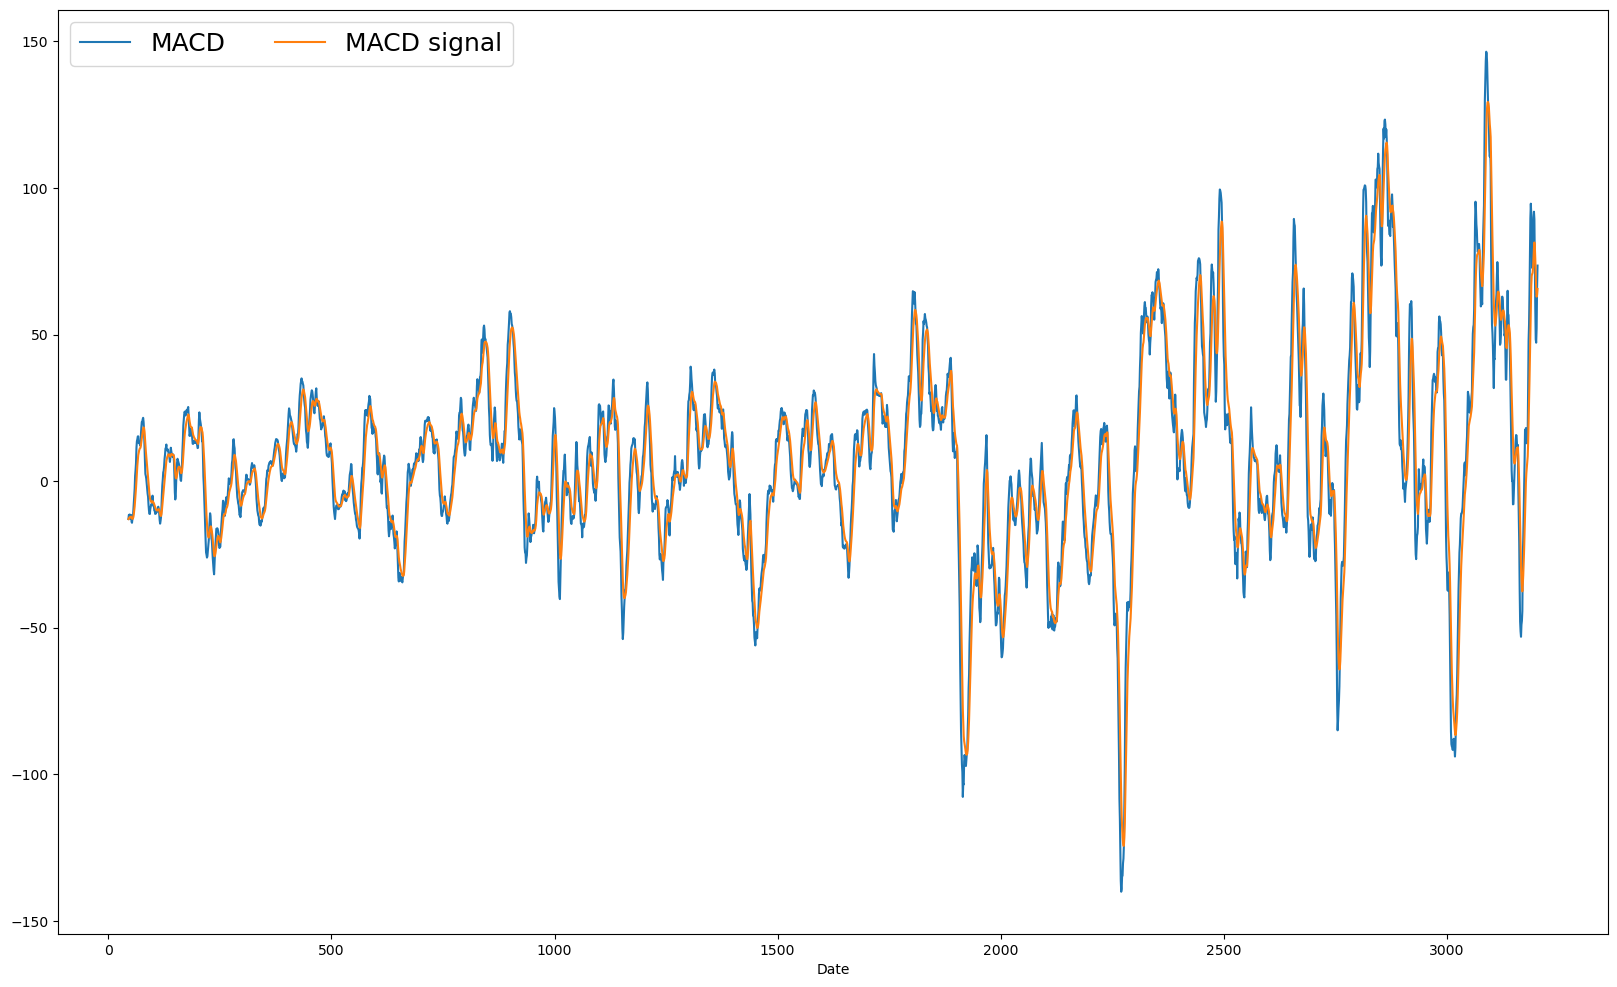

In [64]:
plt.figure(figsize=(20,12))
plt.plot(mnm["MACD"], label = "MACD")
plt.plot(mnm["Signal Line"], label = "MACD signal")
plt.xlabel("Date")
plt.legend(fontsize=18, ncols = 2)
plt.show()
